<a href="https://colab.research.google.com/github/bismillahkani/ISL-CV-Team3/blob/master/ASL_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Importing data

In [0]:
import os
import zipfile

local_zip = '/content/drive/My Drive/ISL-image-dataset-7k.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

Import libraries

In [3]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from keras.models import Model
from keras.models import Sequential
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras import regularizers
from keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

Using TensorFlow backend.


In [0]:
from skimage.feature import hog

Visualize data

In [5]:
dir_list = os.path.dirname('/tmp/ISL-image-dataset-7k/training/')
print((os.listdir(dir_list)))

['Z', 'S', '3', 'L', 'F', '4', 'N', 'Q', 'R', '9', 'A', 'O', 'J', 'M', 'U', 'G', 'X', 'Y', 'T', 'K', 'C', 'H', 'W', 'B', 'D', '5', '2', 'E', 'P', '7', '6', 'V', '8', 'I', '1']


In [6]:
alphabets = [chr(alpha) for alpha in range(ord('A'), ord('Z')+1)]
numbers = [chr(alpha) for alpha in range(ord('1'), ord('9')+1)]
alpha_numerals = alphabets + numbers
print(alpha_numerals)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [7]:
#alphabet = 'W'
for alphabet in alpha_numerals:
  alphabet_dir = os.path.join('/tmp/ISL-image-dataset-7k/training/' + alphabet)
  print('total training alphabet {} images:'.format(alphabet), len(os.listdir(alphabet_dir)))

alphabet_files = os.listdir(alphabet_dir)
print(alphabet_files[:10])

total training alphabet A images: 167
total training alphabet B images: 179
total training alphabet C images: 206
total training alphabet D images: 188
total training alphabet E images: 193
total training alphabet F images: 199
total training alphabet G images: 234
total training alphabet H images: 323
total training alphabet I images: 174
total training alphabet J images: 207
total training alphabet K images: 168
total training alphabet L images: 180
total training alphabet M images: 198
total training alphabet N images: 181
total training alphabet O images: 170
total training alphabet P images: 182
total training alphabet Q images: 188
total training alphabet R images: 181
total training alphabet S images: 204
total training alphabet T images: 211
total training alphabet U images: 186
total training alphabet V images: 200
total training alphabet W images: 232
total training alphabet X images: 276
total training alphabet Y images: 206
total training alphabet Z images: 170
total traini

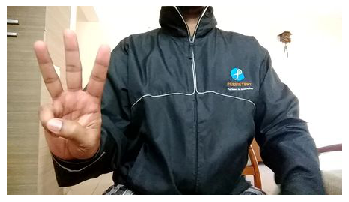

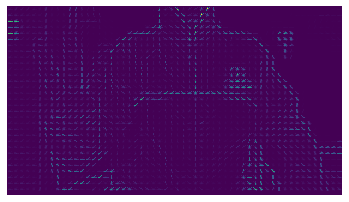

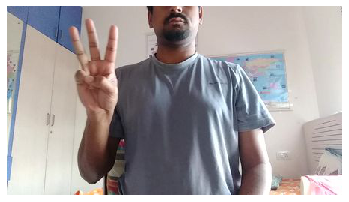

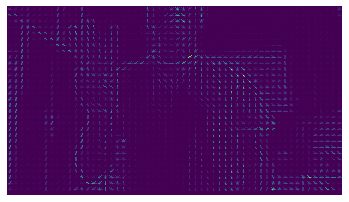

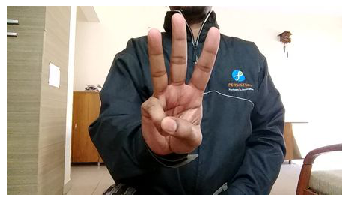

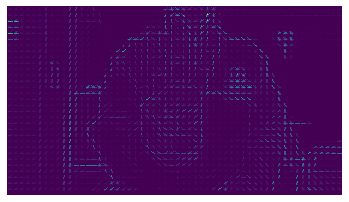

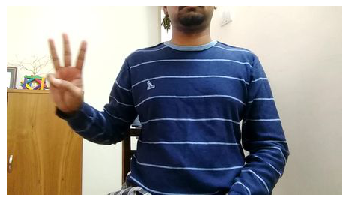

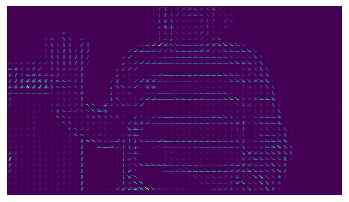

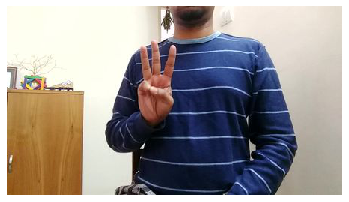

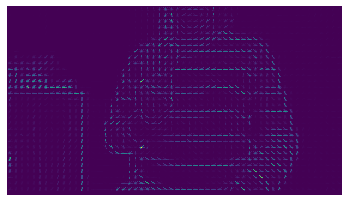

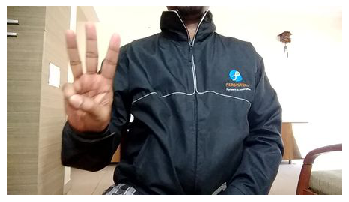

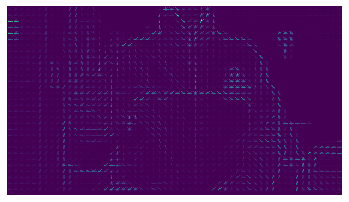

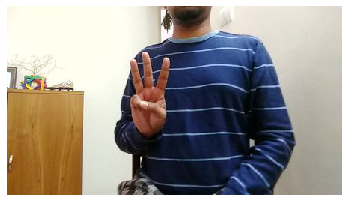

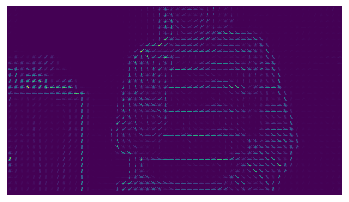

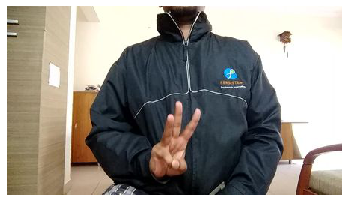

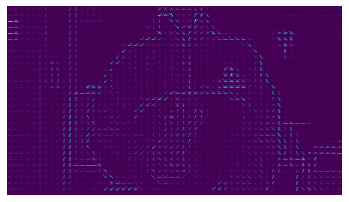

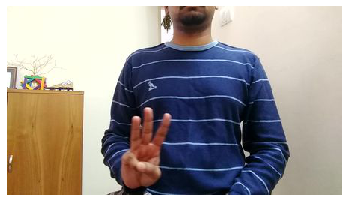

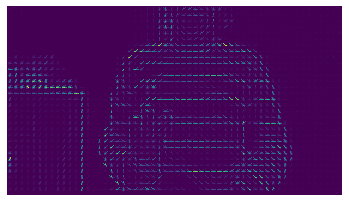

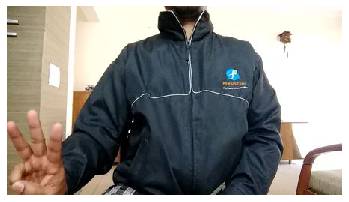

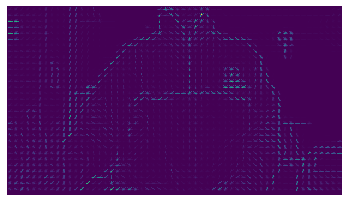

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 86
test_alphabet = '3'
directory = os.path.join('/tmp/ISL-image-dataset-7k/training/' + test_alphabet)
files = os.listdir(directory)

next_alphabet = [os.path.join(directory, fname) 
                for fname in files[pic_index-10:pic_index]]

for i, img_path in enumerate(next_alphabet):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
  plt.imshow(hog_image)
  plt.axis('Off')
  plt.show()

Image Generator

In [9]:
data_dir = "/tmp/ISL-image-dataset-7k/training/"
target_size = (64, 64)
target_dims = (64, 64, 3) # add channel for RGB
n_classes = 35
val_frac = 0.2
batch_size = 64

data_augmentor = ImageDataGenerator(samplewise_center=True, 
                                    samplewise_std_normalization=True,
                                    zoom_range = 0.2,
                                    #zca_whitening = True,
                                    #rotation_range=10,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1, 
                                    validation_split=val_frac)

train_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, color_mode= 'rgb',batch_size=batch_size, shuffle=True, subset="training")
val_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, color_mode= 'rgb',batch_size=batch_size, shuffle=False, subset="validation")

Found 5698 images belonging to 35 classes.
Found 1406 images belonging to 35 classes.


In [0]:
#input_size = (200,200)
#input_dims = (200,200,3)
#numclasses = 29

#TRAINING_DIR = '/tmp/asl_alphabet_train/asl_alphabet_train'
#datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

#train_generator = datagen.flow_from_directory(
#    TRAINING_DIR,
#    target_size=input_size,
#    class_mode='categorical',
#    subset = 'training'    
#)

#validation_generator = datagen.flow_from_directory(
#    TRAINING_DIR,
#    target_size=input_size,
#    class_mode='categorical',
#    subset = 'validation'    
#)

Model 1 - CNN

In [12]:
#tf.reset_default_graph()
#model = Sequential()
model = Sequential([
    
    # This is the first convolution
    Conv2D(128, 3, activation='relu', kernel_regularizer = regularizers.l2(0.01), input_shape=(64,64,3)),
    MaxPooling2D(2, 2),
    # The second convolution
    Conv2D(64, 5, activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    Conv2D(64, 3, activation='relu'),
    #MaxPooling2D(2,2),
    # The fourth convolution
    Conv2D(128, 3, kernel_regularizer = regularizers.l2(0.01), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    # Flatten the results to feed into a DNN
    Flatten(),
    #Dropout(0.25),
    # 512 neuron hidden layer
    Dense(512,  kernel_regularizer = regularizers.l2(0.01), activation='relu'), 
    BatchNormalization(),
    Dropout(0.25),
    Dense(256,  activation='relu'),
    Dense(128,  activation='relu'),
    Dense(n_classes, activation='softmax')
])

model.summary()
sgd_l = SGD(lr=0.01, momentum=0.01, nesterov=True)
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

history = model.fit_generator(train_generator, steps_per_epoch = 500, epochs = 50, validation_data = val_generator, verbose = 1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 27, 27, 64)        204864    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 128)        

In [0]:
Y_pred = model.predict_generator(val_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))
print('Classification Report')
#target_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
target_names = ['Z', 'S', '3', 'L', 'F', '4', 'N', 'Q', 'R', '9', 'A', 'O', 'J', 'M', 'U', 'G', 'X', 'Y', 'T', 'K', 'C', 'H', 'W', 'B', 'D', '5', '2', 'E', 'P', '7', '6', 'V', '8', 'I', '1']
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

22/22 [==============================] - 3s 140ms/step
Confusion Matrix
[[33  1  4 ...  1  0  0]
 [17  0  0 ...  0  0  0]
 [15  0  2 ...  0  0  0]
 ...
 [ 0  0  0 ... 17  5  1]
 [ 0  0  0 ...  0 18  0]
 [ 0  0  0 ...  3  0 11]]
Classification Report
              precision    recall  f1-score   support

           Z       0.36      0.82      0.50        40
           S       0.00      0.00      0.00        34
           3       0.17      0.05      0.08        40
           L       0.00      0.00      0.00        38
           F       0.40      0.35      0.37        40
           4       0.97      0.65      0.78        43
           N       0.85      0.50      0.63        44
           Q       0.43      0.81      0.56        53
           R       0.73      0.98      0.83        44
           9       0.89      0.76      0.82        33
           A       0.76      0.91      0.83        35
           O       0.89      0.98      0.93        41
           J       0.84      0.57      0.68    